# 資料視覺化

Ref:
https://saralgyaan.com/posts/python-candlestick-chart-matplotlib-tutorial-chapter-11/ 舊版 `mpl_finance` 僅能吃 NumPy，而且目前使用會出現 **Deprecated Warning** </br>
https://www.grenade.tw/article/how-to-use-the-python-financial-analysis-visualization-module-mplfinance/ 新版，可以相容 Pandas

In [8]:
# mplfinance 是專門用於金融數據的可視化分析的 Python 模組
!pip install --upgrade mplfinance

     |████████████████████████████████| 267 kB 36.6 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-nvgu9xh8/ta-lib_4f74c00f59ae45e8897b597aa17c8cec/setup.py'"'"'; __file__='"'"'/tmp/pip-install-nvgu9xh8/ta-lib_4f74c00f59ae45e8897b597aa17c8cec/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-gt62huve
       cwd: /tmp/pip-install-nvgu9xh8/ta-lib_4f74c00f59ae45e8897b597aa17c8cec/
  Complete output (27 lines):
  /tmp/pip-install-nvgu9xh8/ta-lib_4f74c00f59ae45e8897b597aa17c8cec/setup.py:71: UserWarning: Cannot find ta-lib library, installation may fail.
    warnings.warn('Cannot find ta-lib library, installation may fail.')
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/l

In [2]:
import numpy as np
import pandas as pd
import mplfinance as mpf

data = pd.read_csv('./Datasets/US_stocks_datasets/stocks.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
print(data.index.min(), data.index.max())
data.head()

2010-07-21 00:00:00 2017-11-10 00:00:00


Open    High     Low   Close  Volume  OpenInt
Date                                                       
2010-07-21  24.333  24.333  23.946  23.946   43321        0
2010-07-22  24.644  24.644  24.362  24.487   18031        0
2010-07-23  24.759  24.759  24.314  24.507    8897        0
2010-07-26  24.624  24.624  24.449  24.595   19443        0
2010-07-27  24.477  24.517  24.431  24.517    8456        0

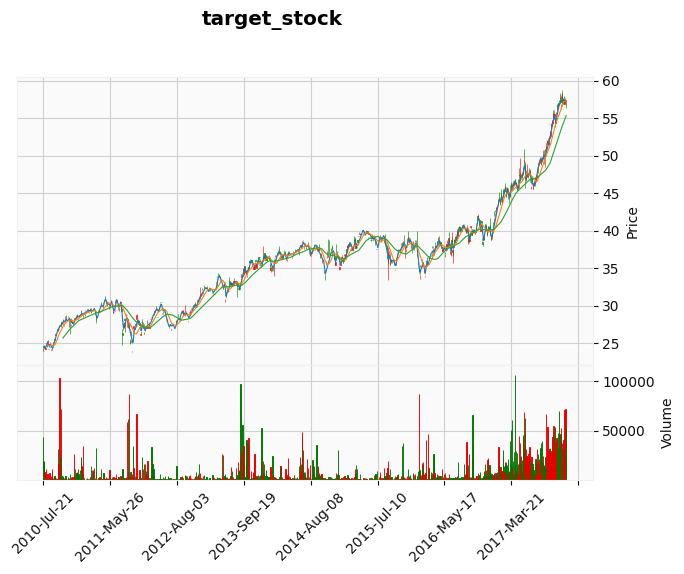

In [4]:
mc = mpf.make_marketcolors(up='r', down='g', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

kwargs = dict(type='candle', mav=(5,20,60), volume=True, title='target_stock', style=s)
mpf.plot(data, **kwargs)